# Projet Maths 3

# Questions théoriques

> **1. Quel théorème du cours nous autorise-t-il à estimer l’espérance conditionnelle par la moyenne empirique de simulations conditionnelles.**

Rappelons le théorème central limite : 

Si les $Z_n$ sont des variables aléatoires réelles, indépendantes et de même loi, de carré intégrable, d'espérance $m$ et de variance $\sigma^2 >0$, alors les variables $\frac{S_n -nm}{\sigma \sqrt{n}}$ convergent en loi vers une variable aléatoire de loi $\mathcal{N}(0,1)$.

En d'autres termes, $\sqrt{n}(M_n - m)$ converge vers une variable normale de loi $\mathcal{N}(0,\sigma^2)$

On en déduit que $n^\alpha (\frac{S_n}{n} - m)$ converge vers 0 (resp. $+\infty$) en probabilité lorsque $\alpha < 1/2$ (resp. $\alpha > 1/2$)

En particulier pour $\alpha = 0$ : 
$$\frac{S_n}{n} \to^\mathbb{P} m$$

Soit $(\Omega,\mathcal{A},\mathbb{P}_Z)$ l'espace probabilisé. Posons $Z_n$ le resultat du  n-ème tirage avec remise d'un élément de cet espace. Les $(Z_n)_\mathbb{N}$ vérifient les conditions d'application du **théorème central limite **. 



On considère le vecteur aléatoire conditionnel $Y|X=x$. En notant Y les valeurs prises aux points de discrétisation sans observation et X les valeurs prises par les composantes aux sites d'observation, on a sans perte de généralité $Z = (X,Y)$.

La moyenne des simulations conditionelles converge vers l'espérance conditionelle. **Il est donc approprié de l'approcher de cette façon.**

> **2. Rappeler la loi conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation.**

Le vecteur aléatoire des composantes de $Z$ correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation est noté $Z'$

En notant $Y$ les valeurs prises aux points de discretisation sans observation et $X$ les valeurs prises par les composantes aux sites d'observation. On a alors sans perte de généralité $Z = (X,Y)$ par permutations.

$Z'= Z|X=x = Y|X=x$ admet une densité $f_{Y|X=x}$
telle que 
$$f_{Y|X=x} =\frac{1}{(2\pi)^{k/2}\sqrt{det(CS_Y)}}exp(-\frac{1}{2}(y-\Psi(x))^\perp CS_Y^{-1}(y-\Psi (x)))$$

avec : 
$$
CS_Y = C_Y - C_{Y,X}C_X^{-1}C_{X,Y} 
$$

où on a  :

$$
E(Y|X=x) = \Psi(z)= m_Y + C_{Y,Z}C_Z^{-1}(z-m_Z)
$$


> **3. Si Y = (Y1, . . . , Yp) est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1, quelle est la loi du vecteur Z = m + RY où R est une matrice p × p et m est un vecteur de taille p ?**

Si Y est un vecteur de composantes gaussiennes indépendantes, toutes d'esperance nulle et de variance 1,  alors on peut caractériser cette variable aléatoire par sa fonction caractéristiques $\Phi_Y(u) =e^{i<u|m>-\frac{1}{2} <u|I_n u>}$

Or d'après le cours de Probabilité $3$: $$\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$$

Ce qui dans notre cas nous donne : 

$$\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$$

Donc Z suit la loi qui a pour fonction caractéristique : 
$$
\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>-\frac{1}{2} <R^\perp u| R^\perp u>}
$$


> **4. En déduire un algorithme de simulation conditionnelle.**

On en déduit donc qu'en utilisant une matrice R bien choisie on peut arriver à simuler un vecteur gaussien conditionnel.

En effet si on choisit la transformée de Cholesky de la matrice de covariance conditionelle $CS_Y$, que l'on notera $R$ :
En posant $Z'  = m +RY$ où $Y = (Y1, . . . , Yp)$ est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1

$\Phi_{Z'}(u) = e^{i<u|m> -\frac{1}{2}<R^\perp u|R^\perp u> }
 =  e^{i< u|m> -\frac{1}{2} <u|CS_Yu>}$ ( par symétrie de R ) 
 
$$
\Phi_{Z'}(u) = e^{i<u| m>-\frac{1}{2} <u|CS_Yu>}
$$

Donc $Z'$ est une variable aléatoire à densité, $Z'$ est un vecteur gaussien.

De plus $Z' $est de même loi que la variable aléatoire gaussienne $Y|X=x$ par identification des fonctions caractéristiques.

On peut donc proposer un algorithme de simulation : 

### Algorithme de simulation
--------

- Fixer les valeurs aux points d'observations 
- Calculer la matrice de covariance conditionelle
- Calculer la transformée de Cholesky
- Simuler Y un vecteur gaussien centré réduit de composantes indépendantes
- Simuler Z par transformation affine
- Recommencer

In [53]:
# chargement des dépendances 

import numpy as np 
import math
import matplotlib.pyplot as plt 
import random
import pandas as pd

In [54]:
#Discrétisation
A=0
B=500
N=101

#Nombre de points de discrétisation 
Delta = (B-A)/(N-1)
print(Delta)
discretization_indexes = np.arange(N) 
discretization = discretization_indexes*Delta 

#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])
#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


5.0


Question 1

In [ ]:
mu_vect = [mu for i in range(N)]

In [55]:
def C(h, a, sig_2):
    return (np.exp(-abs(h)/a)*sig_2)


Question 2

In [56]:
def mat_distance(discretization):
    M=np.ones((len(discretization),len(discretization)))
    for i in range(len(discretization)):
        for j in range(len(discretization)):
            M[i,j] = abs(discretization[i] - discretization[j])
    return M 

Question 3

In [24]:
covar = C(mat_distance(discretization), a, sigma2)

Question 4

In [25]:
rows = np.array(observation_indexes, dtype=np.intp)
columns = np.array(observation_indexes, dtype=np.intp)
covar_obs_obs = covar[rows[:, np.newaxis], columns]

rows = np.array(unknown_indexes, dtype=np.intp)
columns = np.array(unknown_indexes, dtype=np.intp)
covar_unk_unk = covar[rows[:, np.newaxis], columns]

columns = np.array(unknown_indexes, dtype=np.intp)
rows = np.array(observation_indexes, dtype=np.intp)
covar_obs_unk= covar[rows[:, np.newaxis], columns]

Question 5

In [59]:
esp_cond = np.array([mu for i in range(len(unknown_indexes))]) +  covar_obs_unk.transpose() @ np.linalg.inv(covar_obs_obs)@(np.array(depth) - [mu for i in range( len( observation_indexes)) ])

In [60]:
cov_cond = covar_unk_unk - covar_obs_unk.transpose()@np.linalg.inv(covar_obs_obs) @ covar_obs_unk

In [63]:
X=np.array([ cov_cond[i,i] for i in range (len(cov_cond))])

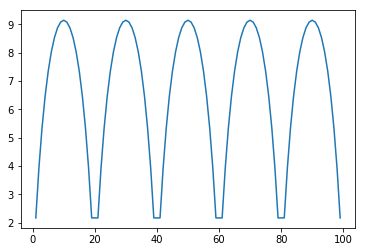

In [64]:
plt.plot(unknown_indexes,X)
plt.show()

Question 7

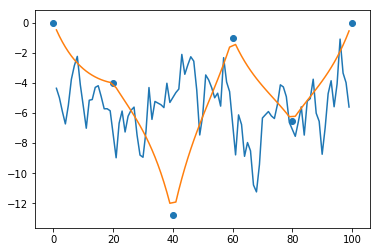

In [70]:
L = np.linalg.cholesky(cov_cond)
L = L.transpose()

def simul( L ):
    f= lambda u,v : np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    g= lambda u,v : np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)
    Y = np.random.normal(0,1,len(unknown_indexes))
    Z = np.array([mu for i in range(len( unknown_indexes))])+ L@ Y
    return Z
Z = simul(L)
plt.plot(unknown_indexes,Z)
plt.plot(unknown_indexes, esp_cond)
plt.scatter(observation_indexes,depth)
plt.show()

On obtient une approximation plausible du profil de profondeur.

Question 8

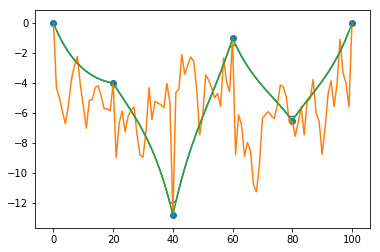

In [75]:
def builder(depth,observation_indexes, Z , N):
    prof = []
    depth_ =list(depth)
    Z_ = list(Z)
    for i in range (N):

        if i in observation_indexes :
            prof.append(depth_.pop(0))
        else : 
            prof.append(Z_.pop(0))
    return prof
prof = builder(depth, observation_indexes,Z,N)

plt.plot(unknown_indexes, esp_cond)
plt.plot(prof)
plt.scatter(observation_indexes,depth)
plt.plot(builder(depth,observation_indexes,esp_cond,N))
plt.show()

def longueur ( prof, delta):
    S = 0
    for i in range(1,len(prof)):
        S+= np.sqrt(delta**2 +(prof[i]-prof[i-1])**2)
    return S

Question 9

In [79]:
def simul_N ( Number , Delta):
    length = []
    for i in range (Number):
        length.append(longueur(builder(depth,observation_indexes,simul(L),N),Delta))
    return length
print('Esperance conditionnelle de la longueur:', np.array(simul_N(100,Delta)).mean())

Esperance conditionnelle de la longueur: 537.104983287


In [81]:
print('Delta :', Delta)
L_th = longueur(builder(depth,observation_indexes,esp_cond,N),Delta)
print("Longueur de l'espérance conditionnelle :", L_th)


Delta : 5.0
Longueur de l'espérance conditionnelle : 501.646841692


# 100 // 1000 // 10000 // 100000 simulations

In [50]:
simul_total = simul_N(1000,Delta)

info = []
num = [100,1000,10000,100000]
subplot_list = [221,222,223,224]

for borne, sub in zip(num,subplot_list):
    means = []
    simuls = np.array(simul_total[:borne])
    for i in range(1,len(simuls)):
        plt.subplot(sub)
        means.append(np.array(simuls[:i]).mean())
        plt.plot(means)
    info.append({ 
                'mean' : simuls.mean()
                ,'std' : simuls.std()
                ,'conf' : 1.960*simuls.std()/np.sqrt(len(simuls))})

C:\Users\youri\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Question 11

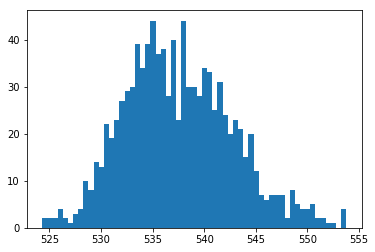

In [82]:
plt.hist(simuls, bins = np.arange(simuls.min(),simuls.max(),0.5), align = 'left')
plt.show()

Question 12

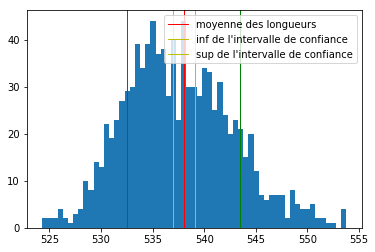

In [88]:
mean, std, conf = info[0]['mean'], info[0]['std'], info[0]['conf']  
plt.hist(simuls, bins = np.arange(simuls.min(),simuls.max(),0.5), align = 'left')
plt.axvline(x=mean, linewidth=1, color='r', label = "moyenne des longueurs")
plt.axvline(x=mean +std, linewidth=1, color='g')
plt.axvline(x=mean - std, linewidth=1, color='g')
plt.axvline(x=mean - conf, linewidth=1, color='y', label = "inf de l'intervalle de confiance")
plt.axvline(x=mean + conf, linewidth=1, color='y', label = "sup de l'intervalle de confiance")
plt.legend()
plt.show()


Question 13

In [48]:
# Calculer la fonction de répartition expérimentale

def F_repart(level, simuls):
    S = 0
    for i in simuls:
        if i >level :
            S+=1
    return  1 - S/len(simuls)

In [86]:
print('Une estimation de la probabilité que la longueur du cable dépasse 125 m est :', 1- F_repart(525,simuls))

Une estimation de la probabilité que la longueur du cable dépasse 125 m est : 0.998
